<a href="https://colab.research.google.com/github/Geo6g/Classification/blob/main/georgy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('churn_data.csv')

In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB
None


In [4]:
print(df.head())

   satisfaction  evaluation number_of_projects  average_montly_hours  \
0          0.38       530.0                two                 157.0   
1          0.80       860.0               five                 262.0   
2          0.11       880.0              seven                 272.0   
3          0.72       870.0               five                 223.0   
4          0.37       520.0                two                 159.0   

  time_spend_company work_accident churn promotion department  salary  
0                 3+            no   yes        no      sales     low  
1                 6+            no   yes        no      sales  medium  
2                 4+            no   yes        no      sales  medium  
3                 5+            no   yes        no      sales     low  
4                 3+            no   yes        no      sales     low  


In [5]:
print(df.isnull().sum())

satisfaction             9
evaluation              63
number_of_projects      44
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department              41
salary                   0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = {}
for col in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

/tmp/ipython-input-8-1047153544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('churn')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

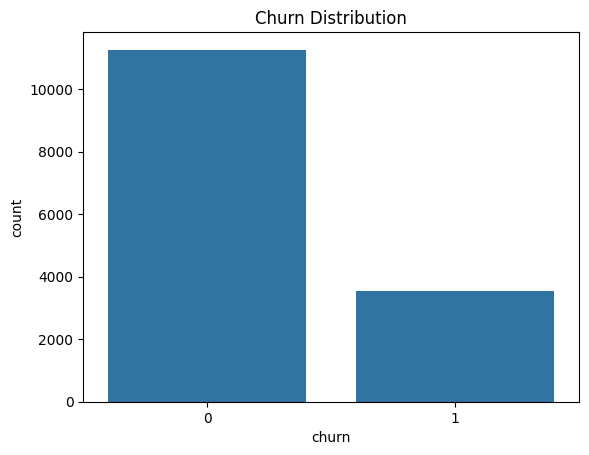

In [11]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

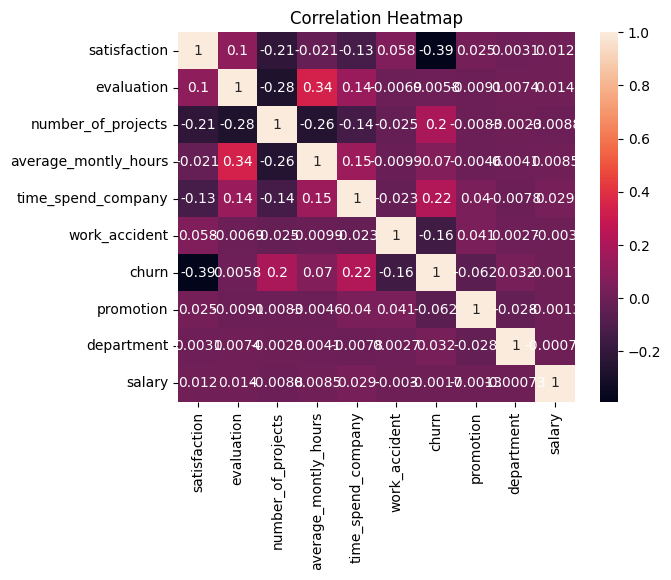

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

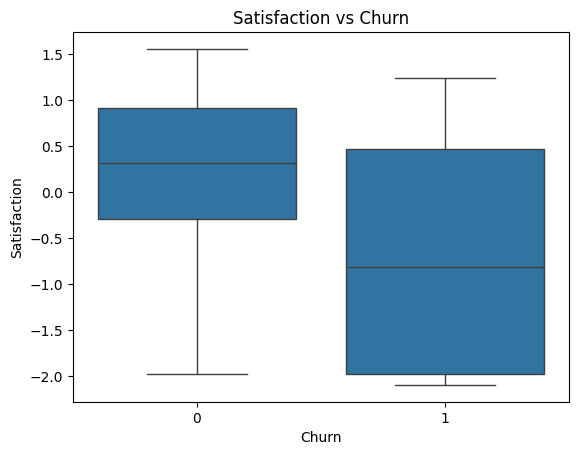

In [13]:
sns.boxplot(x='churn', y='satisfaction', data=df)
plt.title('Satisfaction vs Churn')
plt.xlabel('Churn')
plt.ylabel('Satisfaction')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
X=df.drop('churn',axis=1)
y=df['churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier()
}

In [18]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(f'{name} Accuracy:{model.score(X_test,y_test):.2f}')

Logistic Regression Accuracy:0.76
Random Forest Accuracy:0.99
Decision Tree Accuracy:0.98


In [19]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,cv=5,verbose=1,n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Only solver supporting both l1 and l2
}

lr = LogisticRegression(max_iter=1000, random_state=42)

lr_grid_search = GridSearchCV(estimator=lr,
                              param_grid=lr_param_grid,
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

lr_grid_search.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", lr_grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [22]:
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest
Accuracy: 0.9892037786774629
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2248
           1       0.99      0.97      0.98       716

    accuracy                           0.99      2964
   macro avg       0.99      0.98      0.99      2964
weighted avg       0.99      0.99      0.99      2964



In [23]:
best_lr = lr_grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression
Accuracy: 0.7601214574898786
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2248
           1       0.51      0.26      0.34       716

    accuracy                           0.76      2964
   macro avg       0.65      0.59      0.60      2964
weighted avg       0.73      0.76      0.73      2964



In [24]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_dt = dt_default.predict(X_test)

print(" Decision Tree (Default)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


 Decision Tree (Default)
Accuracy: 0.9770580296896086
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2248
           1       0.94      0.97      0.95       716

    accuracy                           0.98      2964
   macro avg       0.96      0.97      0.97      2964
weighted avg       0.98      0.98      0.98      2964



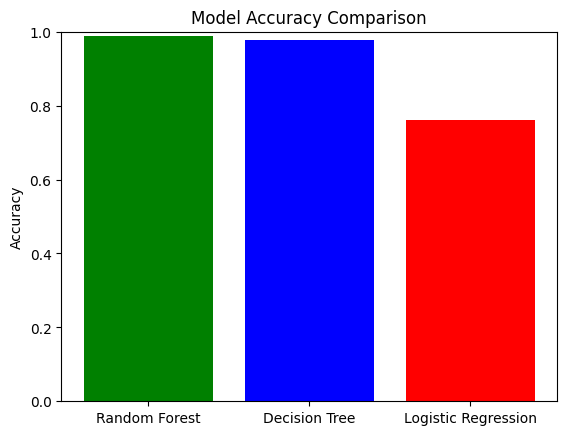

In [25]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [0.9892, 0.9771, 0.7601]

plt.bar(models, accuracies, color=['green', 'blue', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [26]:
acc_rf = rf_grid_search.best_estimator_.score(X_test, y_test)
acc_lr = lr_grid_search.best_estimator_.score(X_test, y_test)
acc_dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train).score(X_test, y_test)
accuracies = {
    'Random Forest': acc_rf,
    'Logistic Regression': acc_lr,
    'Decision Tree': acc_dt
}
best_model = max(accuracies, key=accuracies.get)
print(f"Best model is: {best_model} with accuracy: {accuracies[best_model]:.4f}")

Best model is: Random Forest with accuracy: 0.9892


In [27]:

X_selected = X_test.iloc[[92, 93]]


y_pred = best_rf.predict(X_selected)
y_proba = best_rf.predict_proba(X_selected)[:, 1]


for i, idx in enumerate([92, 93]):
    print(f"\nSample {idx}")
    print(X_selected.iloc[i])
    print(" Prediction:", "Churn" if y_pred[i] == 1 else "No Churn")
    print(f" Probability of Churn: {y_proba[i]:.2f}")



Sample 92
satisfaction            1.155959
evaluation              1.189142
number_of_projects     -1.317415
average_montly_hours    0.879044
time_spend_company      1.286939
work_accident          -0.410207
promotion              -0.147625
department              0.394177
salary                 -0.555098
Name: 468, dtype: float64
 Prediction: Churn
 Probability of Churn: 1.00

Sample 93
satisfaction            1.155959
evaluation              1.655171
number_of_projects     -0.778072
average_montly_hours    0.339144
time_spend_company     -1.085204
work_accident          -0.410207
promotion              -0.147625
department             -0.302195
salary                 -0.555098
Name: 10538, dtype: float64
 Prediction: No Churn
 Probability of Churn: 0.05


 Random Forest was the most accurate model for predicting churn, outperforming
 Logistic Regression and Decision Tree.

 Low satisfaction level and longer tenure were strong indicators of higher employee churn.

 Encoded categorical features (department, salary) and normalized numerical data were used for model training.

Sample predictions showed reliable performance, with churn probabilities giving clear risk insights.

